In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [7]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

In [8]:
print(train_img.shape, test_img.shape, train_label.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1) (42000,)


In [9]:
train = train[:,1:]

In [11]:
print(train.shape, train_label.shape, test.shape)

(42000, 784) (42000,) (28000, 784)


##  Feature extraction

In [15]:
def feature_extraction(train, test, n_components):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train)
    X_test_scaled = scaler.transform(test)
    
    pca = PCA(n_components)
    X_train = pca.fit_transform(X_train_scaled)
    X_test = pca.transform(X_test_scaled)
    
    return X_train, X_test

In [22]:
X_train, X_test = feature_extraction(train, test, n_components=120)

## Logistic Regression

In [24]:
model = LogisticRegression(solver='lbfgs', max_iter=42000)

In [25]:
model.fit(X_train, train_label)

LogisticRegression(max_iter=42000)

In [27]:
model.score(X_train, train_label)

0.9274523809523809

In [28]:
y_pred_test = model.predict(X_test)

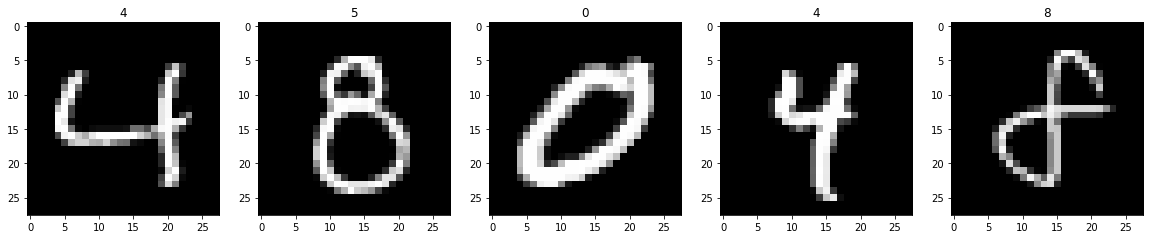

In [29]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], y_pred_test[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

5.0


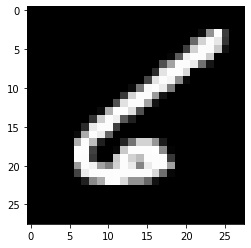

In [88]:
q=np.random.randint(len(y_pred_test))
print(y_pred_test[q])
plt.imshow(test_img[q], cmap='gray');

## KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, train_label)

KNeighborsClassifier()

In [39]:
y_pred_test_knn = knn.predict(X_test)

In [42]:
knn.score(X_train, train_label)

0.9688095238095238

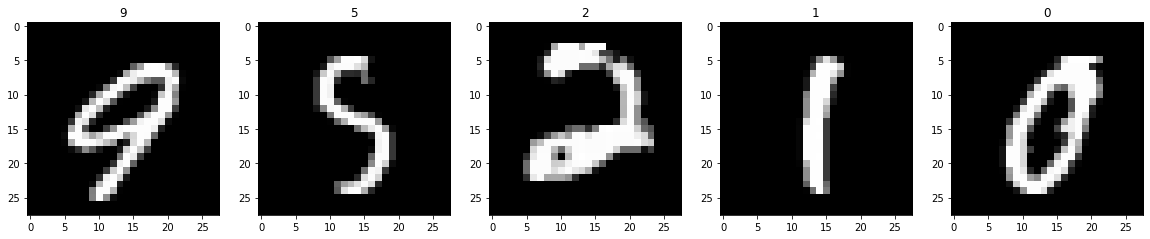

In [40]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], y_pred_test_knn[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

8.0


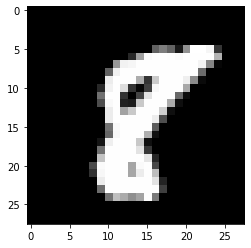

In [98]:
i=np.random.randint(len(y_pred_test_knn))
print(y_pred_test_knn[i])
plt.imshow(test_img[i], cmap='gray');

In [99]:
pd.DataFrame({"ImageId":list(range(1,len(y_pred_test_knn)+1)),
              "Label":y_pred_test_knn}).to_csv('KAGGLE_SUBMISSION_FILE9.csv',
                                           index=False,
                                           header=True)